<div style="color:white;
            display:fill;
            border-radius:5px;
            background: rgb(182,213,183);
            background-image: linear-gradient(275deg, rgba(182,213,183,1) 25%, rgba(165,165,200,1) 75%);
            font-size:110%;
            font-family:Verdana;
            letter-spacing:0.5px">
    <h2 style="padding: 10px;
              color:white;"> Import libraries </h2>
</div>

In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt

<div style="color:white;
            display:fill;
            border-radius:5px;
            background: rgb(182,213,183);
            background-image: linear-gradient(275deg, rgba(182,213,183,1) 25%, rgba(165,165,200,1) 75%);
            font-size:110%;
            font-family:Verdana;
            letter-spacing:0.5px">
    <h2 style="padding: 10px;
              color:white;"> Import data and basic EDA </h2>
</div>

In [2]:
df = pd.read_csv('fake_bills.csv', delimiter = ';', decimal='.')
df

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54
...,...,...,...,...,...,...,...
1495,False,171.75,104.38,104.17,4.42,3.09,111.28
1496,False,172.19,104.63,104.44,5.27,3.37,110.97
1497,False,171.80,104.01,104.12,5.51,3.36,111.95
1498,False,172.06,104.28,104.06,5.17,3.46,112.25


The example dataset has been downloaded from Kaggle: [Fake Bills](https://www.kaggle.com/datasets/alexandrepetit881234/fake-bills)

It is composed by 1500 samples, 6 float fatures and the binary target variable _is_genuine_

In [3]:
target = df.columns[0]
features = df.columns[1:]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   bool   
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1463 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 71.9 KB


Since the feature _margin_low_ has 1463 non-null values, let's remove the samples with _na_

In [12]:
df.dropna(axis = 0, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1463 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1463 non-null   bool   
 1   diagonal      1463 non-null   float64
 2   height_left   1463 non-null   float64
 3   height_right  1463 non-null   float64
 4   margin_low    1463 non-null   float64
 5   margin_up     1463 non-null   float64
 6   length        1463 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 81.4 KB


<div style="color:white;
            display:fill;
            border-radius:5px;
            background: rgb(182,213,183);
            background-image: linear-gradient(275deg, rgba(182,213,183,1) 25%, rgba(165,165,200,1) 75%);
            font-size:110%;
            font-family:Verdana;
            letter-spacing:0.5px">
    <h2 style="padding: 10px;
              color:white;"> myPCA class definition </h2>
</div>

In [6]:
class myPCA:
    
    def __init__(self, df ,comp: int = 2):
        # Initialize the class with the dataframe and the desired number of principal components.
        self.components = comp
        self.dataframe = df
        
        # Check if the specified number of components is valid.
        if self.components > len(self.dataframe.columns):
            return print(f'Number of components ({self.components}) must be lower than the number of features ({len(self.dataframe.columns)})')
        
        # Create a PCA object with the specified number of components and compute the principal components.
        self.pca = PCA(n_components=self.components)
        col = []
        for i in range(self.components):
            col.append(f'PCA {i + 1}')
        self.scores = pd.DataFrame(self.pca.fit_transform(self.dataframe), columns=col)
        
    def cum_expl_variance(self):
        # Calculate and visualize the cumulative explained variance for each number of principal components.
        xint = range(1, len(self.pca.explained_variance_ratio_) + 1)
        plt.plot(xint, np.cumsum(self.pca.explained_variance_ratio_))
        plt.xlabel("Number of components")
        plt.ylabel("Cumulative explained variance")
        plt.xticks(xint)
        plt.grid(visible=True)
        plt.xlim(1, self.components, 1)
        plt.show()
        
        print(f'Cumulative explained variance with {self.components} components: {np.sum(self.pca.explained_variance_ratio_)*100}%')
        
    def biplot(self, target, PCx: int = 1, PCy: int = 2):
        # Create a biplot using the specified principal components as axes.
        
        if ((PCx > self.pca.n_components) or (PCy > self.pca.n_components)):
            return print('ERROR: PCx and PCy must be lower or equal to the number of PCA components')

        features = self.dataframe.columns
        ldngs = self.pca.components_

        fig, ax = plt.subplots(figsize=(14, 9))

        # Draw arrows for the original variables in the biplot.
        for i, feature in enumerate(features):
            ax.arrow(0, 0, ldngs[PCx-1, i], 
                     ldngs[PCy-1, i], 
                     head_width=0.03, 
                     head_length=0.03)
            ax.text(ldngs[PCx-1, i] * 1.15, 
                    ldngs[PCy-1, i] * 1.15, 
                    feature, fontsize=12)

        PCx = 'PCA ' + f'{PCx}'
        PCy = 'PCA ' + f'{PCy}'

        scaledx = 'scale ' + PCx
        scaledy = 'scale ' + PCy

        # Create a scatter plot of the scaled principal components.
        scatter = ax.scatter(self.scores[PCx].values / (self.scores[PCx].max() - self.scores[PCx].min()), 
                             self.scores[PCy].values / (self.scores[PCy].max() - self.scores[PCy].min()), 
                             c=target.values, 
                             cmap='Set3')
        
        ax.set_xlabel(PCx, fontsize=20)
        ax.set_ylabel(PCy, fontsize=20)
        ax.set_title('Biplot', fontsize=20)

        ax.legend(*scatter.legend_elements(),
                            loc="lower left", 
                            title=f"{target.name}")

<div style="color:white;
            display:fill;
            border-radius:5px;
            background: rgb(182,213,183);
            background-image: linear-gradient(275deg, rgba(182,213,183,1) 25%, rgba(165,165,200,1) 75%);
            font-size:110%;
            font-family:Verdana;
            letter-spacing:0.5px">
    <h2 style="padding: 10px;
              color:white;"> myPCA class test </h2>
</div>

Before the real test, let's scale the dataset with scikit-learn's Standard Scaling

In [7]:
df_scaled = StandardScaler().fit_transform(df[features])
df_scaled = pd.DataFrame(df_scaled, columns = features)
df_scaled

,diagonal,height_left,height_right,margin_low,margin_up,length
0,-0.488594,2.766807,3.173766,0.051286,-1.136982,0.177842
1,-1.634809,-2.241490,-0.806851,-1.078937,-0.704806,0.475692
2,2.393318,1.498039,-1.300571,-0.129549,-0.920894,0.555882
3,-1.962299,-0.405114,0.057159,-1.304982,-0.618370,0.956834
4,-0.750586,0.830266,-1.424001,-0.672057,1.412861,-0.154375
...,...,...,...,...,...,...
1458,-0.685088,1.164152,0.766882,-0.099410,-0.272629,-1.597801
1459,0.755868,1.998868,1.600034,1.181509,0.937466,-1.952929
1460,-0.521343,-0.071228,0.612594,1.543181,0.894249,-0.830265
1461,0.330131,0.830266,0.427449,1.030813,1.326425,-0.486592


In [8]:
myPCA_test = myPCA(df[features], comp = 6)

I created myPCA_test object asking for the maximum number of principal components.

It is possible to modify this number between 2 (the default value in the formula) and the number of the features (6 in this case).  

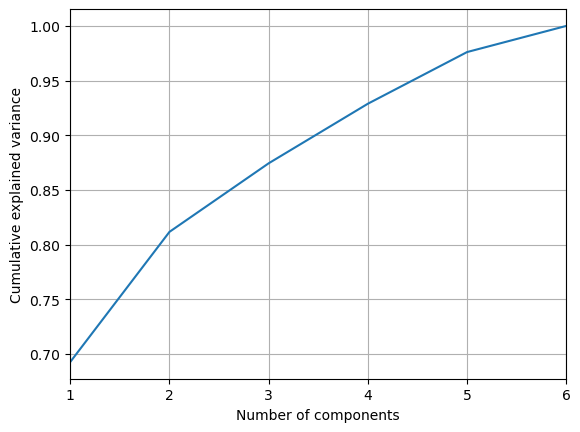

Cumulative explained variance with 6 components: 99.99999999999999%


In [9]:
myPCA_test.cum_expl_variance()

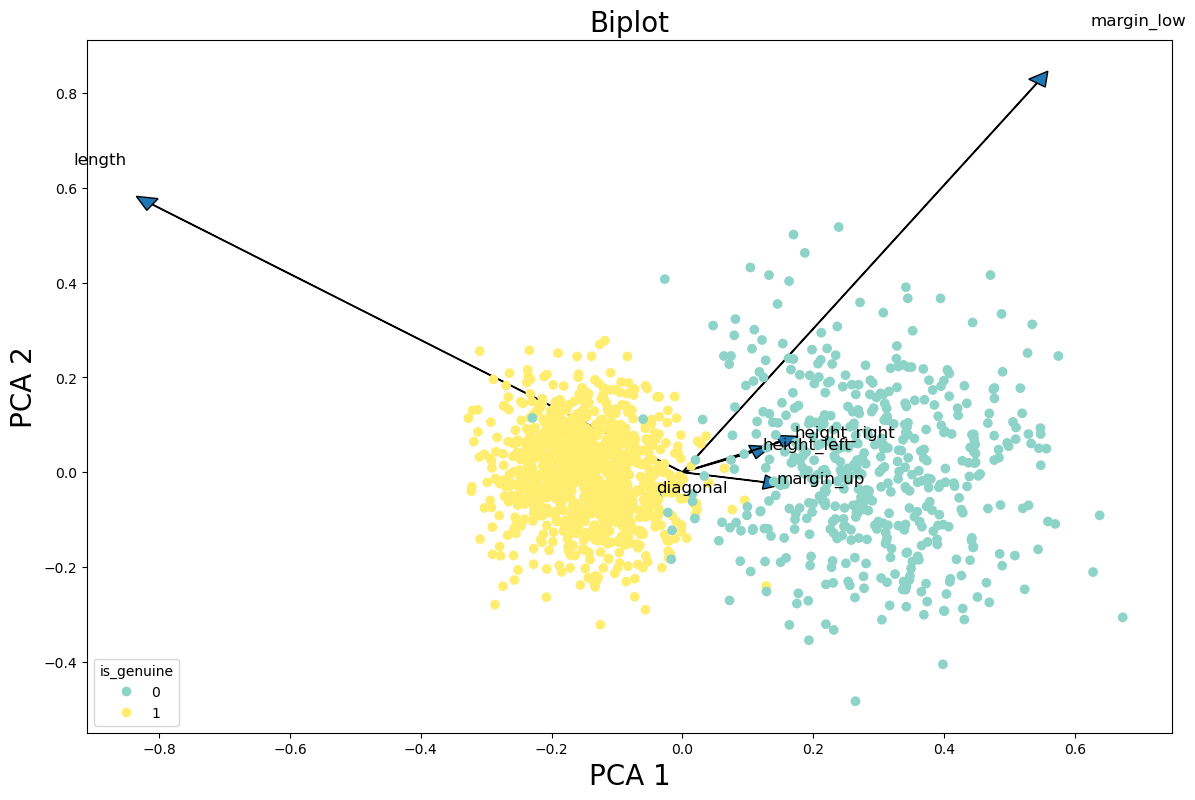

In [10]:
myPCA_test.biplot(df[target])

Biplot correctly shows the scatterplot of the first and second Principal Components.

It is possible also to select which Principal Component to plot, for example I could plot the fifth and the sixth Principal Components.

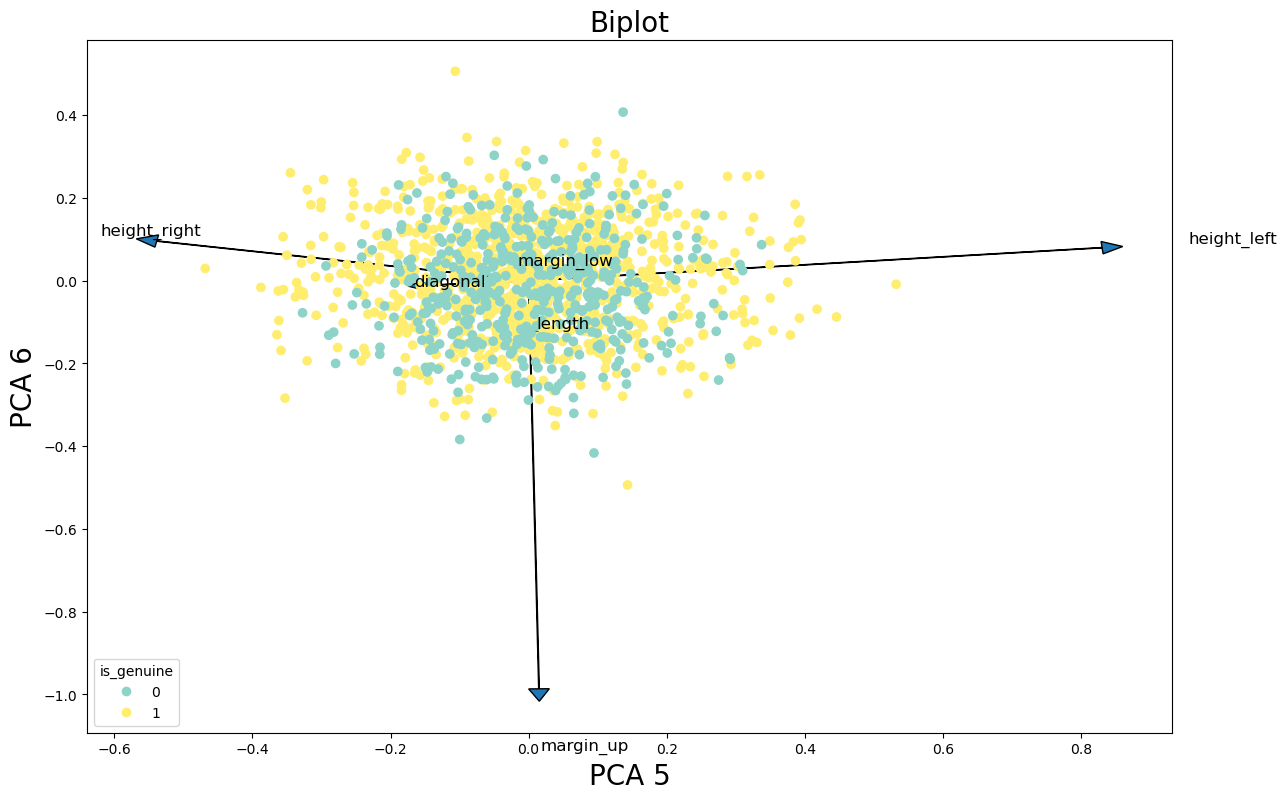

In [11]:
myPCA_test.biplot(df[target], 5, 6)

Improvements ideas:
* Integrate the data scaling inside the class
* Autoselect the optimal number of Principal Components